# (a) Dense vs CNN

## CNN

In [1]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.

It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

S:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


170500096/170498071 [==============================] - 66s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 188s 120ms/step - loss: 1.8485 - acc: 0.3175 - val_loss: 1.5499 - val_acc: 0.4297
Epoch 2/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5706 - acc: 0.4259 - val_loss: 1.3931 - val_acc: 0.4940
Epoch 3/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4492 - acc: 0.4752 - val_loss: 1.3100 - val_acc: 0.5293
Epoch 4/100
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3670 - acc: 0.5092 - val_loss: 1.2051 - val_acc: 0.5687
Epoch 5/100
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2996 - acc: 0.5357 - val_loss: 1.1904 - val_acc: 0.5721
Epoch 6/100
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2426 - acc: 0.5584 - val_loss: 1.1641 - val_acc: 0.5922


1563/1563 [==============================] - 37s 23ms/step - loss: 0.7880 - acc: 0.7327 - val_loss: 0.6823 - val_acc: 0.7717
Epoch 59/100
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7801 - acc: 0.7373 - val_loss: 0.7458 - val_acc: 0.7513
Epoch 60/100
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7838 - acc: 0.7365 - val_loss: 0.7215 - val_acc: 0.7581
Epoch 61/100
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7860 - acc: 0.7357 - val_loss: 0.6867 - val_acc: 0.7673
Epoch 62/100
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7858 - acc: 0.7353 - val_loss: 0.7120 - val_acc: 0.7678
Epoch 63/100
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7832 - acc: 0.7355 - val_loss: 0.7128 - val_acc: 0.7730
Epoch 64/100
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7869 - acc: 0.7347 - val_loss: 0.7041 - val_acc: 0.7603
Epoch 65/100
1563/1563 [=======================

## Dense with 0 hidden layer

In [41]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model7_name = 'keras_cifar10_trained_model.h7'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model7 = Sequential()

model7.add(Flatten(input_shape=x_train.shape[1:]))
model7.add(Dense(num_classes))
model7.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model7.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model7.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model7.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model7_path = os.path.join(save_dir, model7_name)
model7.save(model7_path)
print('Saved trained model at %s ' % model7_path)

# Score trained model.
scores = model7.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
1563/1562 [==============================] - 29s 19ms/step - loss: 2.0205 - acc: 0.2750 - val_loss: 1.8992 - val_acc: 0.3273
Epoch 2/100
1563/1562 [==============================] - 28s 18ms/step - loss: 1.9086 - acc: 0.3259 - val_loss: 1.8477 - val_acc: 0.3547
Epoch 3/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.8792 - acc: 0.3377 - val_loss: 1.8153 - val_acc: 0.3683
Epoch 4/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.8654 - acc: 0.3440 - val_loss: 1.7976 - val_acc: 0.3723
Epoch 5/100
1563/1562 [==============================] - 26s 16ms/step - loss: 1.8531 - acc: 0.3508 - val_loss: 1.7939 - val_acc: 0.3767
Epoch 6/100
1563/1562 [==============================] - 26s 16ms/step - loss: 1.8481 - acc: 0.3511 - val_loss: 1.8003 - val_acc: 0.3686
Epoch 7/100
1563/1562 [==============================] - 25s 16ms/step

1563/1562 [==============================] - 24s 15ms/step - loss: 1.7887 - acc: 0.3817 - val_loss: 1.7147 - val_acc: 0.4084
Epoch 60/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.7869 - acc: 0.3825 - val_loss: 1.7285 - val_acc: 0.4053
Epoch 61/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.7905 - acc: 0.3816 - val_loss: 1.7246 - val_acc: 0.3984
Epoch 62/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.7907 - acc: 0.3793 - val_loss: 1.7424 - val_acc: 0.3949
Epoch 63/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.7874 - acc: 0.3831 - val_loss: 1.7282 - val_acc: 0.4005
Epoch 64/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.7894 - acc: 0.3816 - val_loss: 1.7375 - val_acc: 0.4040
Epoch 65/100
1563/1562 [==============================] - 24s 16ms/step - loss: 1.7862 - acc: 0.3813 - val_loss: 1.7125 - val_acc: 0.4153
Epoch 66/100
1563/1562 [=======================

## Dense with 1 hidden layer

In [40]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model0_name = 'keras_cifar10_trained_model.h0'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model0 = Sequential()

model0.add(Flatten(input_shape=x_train.shape[1:]))
model0.add(Dense(512))
model0.add(Activation('relu'))
model0.add(Dropout(0.5))
model0.add(Dense(num_classes))
model0.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model0.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model0_path = os.path.join(save_dir, model0_name)
model0.save(model0_path)
print('Saved trained model at %s ' % model0_path)

# Score trained model.
scores = model0.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
1563/1562 [==============================] - 18s 11ms/step - loss: 2.0189 - acc: 0.2699 - val_loss: 1.8100 - val_acc: 0.3637
Epoch 2/100
1563/1562 [==============================] - 17s 11ms/step - loss: 1.8897 - acc: 0.3217 - val_loss: 1.7246 - val_acc: 0.3997
Epoch 3/100
1563/1562 [==============================] - 17s 11ms/step - loss: 1.8382 - acc: 0.3431 - val_loss: 1.6831 - val_acc: 0.4095
Epoch 4/100
1563/1562 [==============================] - 29s 18ms/step - loss: 1.8126 - acc: 0.3526 - val_loss: 1.6562 - val_acc: 0.4181
Epoch 5/100
1563/1562 [==============================] - 20s 13ms/step - loss: 1.7850 - acc: 0.3660 - val_loss: 1.6193 - val_acc: 0.4426
Epoch 6/100
1563/1562 [==============================] - 17s 11ms/step - loss: 1.7681 - acc: 0.3727 - val_loss: 1.6167 - val_acc: 0.4380
Epoch 7/100
1563/1562 [==============================] - 20s 13ms/step

1563/1562 [==============================] - 25s 16ms/step - loss: 1.6292 - acc: 0.4280 - val_loss: 1.4047 - val_acc: 0.5124
Epoch 60/100
1563/1562 [==============================] - 28s 18ms/step - loss: 1.6265 - acc: 0.4310 - val_loss: 1.4004 - val_acc: 0.5173
Epoch 61/100
1563/1562 [==============================] - 29s 18ms/step - loss: 1.6230 - acc: 0.4341 - val_loss: 1.4169 - val_acc: 0.5160
Epoch 62/100
1563/1562 [==============================] - 27s 18ms/step - loss: 1.6264 - acc: 0.4331 - val_loss: 1.4127 - val_acc: 0.5164
Epoch 63/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.6261 - acc: 0.4334 - val_loss: 1.4055 - val_acc: 0.5093
Epoch 64/100
1563/1562 [==============================] - 26s 17ms/step - loss: 1.6299 - acc: 0.4291 - val_loss: 1.4439 - val_acc: 0.5075
Epoch 65/100
1563/1562 [==============================] - 26s 17ms/step - loss: 1.6270 - acc: 0.4303 - val_loss: 1.4048 - val_acc: 0.5073
Epoch 66/100
1563/1562 [=======================

## Dense with 2 hidden layers

In [42]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model1_name = 'keras_cifar10_trained_model.h1'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model1 = Sequential()

model1.add(Flatten(input_shape=x_train.shape[1:]))
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model1_path = os.path.join(save_dir, model1_name)
model1.save(model1_path)
print('Saved trained model at %s ' % model1_path)

# Score trained model.
scores = model1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
1563/1562 [==============================] - 27s 17ms/step - loss: 2.0946 - acc: 0.2281 - val_loss: 1.8911 - val_acc: 0.3302
Epoch 2/100
1563/1562 [==============================] - 29s 18ms/step - loss: 1.9506 - acc: 0.2892 - val_loss: 1.7914 - val_acc: 0.3662
Epoch 3/100
1563/1562 [==============================] - 29s 18ms/step - loss: 1.9061 - acc: 0.3102 - val_loss: 1.7587 - val_acc: 0.3799
Epoch 4/100
1563/1562 [==============================] - 30s 19ms/step - loss: 1.8797 - acc: 0.3262 - val_loss: 1.6960 - val_acc: 0.4034
Epoch 5/100
1563/1562 [==============================] - 29s 18ms/step - loss: 1.8632 - acc: 0.3305 - val_loss: 1.6814 - val_acc: 0.4161
Epoch 6/100
1563/1562 [==============================] - 36s 23ms/step - loss: 1.8422 - acc: 0.3397 - val_loss: 1.6692 - val_acc: 0.4150
Epoch 7/100
1563/1562 [==============================] - 28s 18ms/step

1563/1562 [==============================] - 26s 16ms/step - loss: 1.7455 - acc: 0.3870 - val_loss: 1.5237 - val_acc: 0.4774
Epoch 60/100
1563/1562 [==============================] - 25s 16ms/step - loss: 1.7410 - acc: 0.3906 - val_loss: 1.5056 - val_acc: 0.4769
Epoch 61/100
1563/1562 [==============================] - 25s 16ms/step - loss: 1.7387 - acc: 0.3896 - val_loss: 1.5258 - val_acc: 0.4681
Epoch 62/100
1563/1562 [==============================] - 26s 17ms/step - loss: 1.7411 - acc: 0.3879 - val_loss: 1.5401 - val_acc: 0.4713
Epoch 63/100
1563/1562 [==============================] - 30s 19ms/step - loss: 1.7393 - acc: 0.3909 - val_loss: 1.5176 - val_acc: 0.4733
Epoch 64/100
1563/1562 [==============================] - 28s 18ms/step - loss: 1.7319 - acc: 0.3932 - val_loss: 1.5031 - val_acc: 0.4786
Epoch 65/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.7498 - acc: 0.3852 - val_loss: 1.5086 - val_acc: 0.4804
Epoch 66/100
1563/1562 [=======================

## Dense with 3 hidden layers

In [43]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model2_name = 'keras_cifar10_trained_model.h2'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()

model2.add(Flatten(input_shape=x_train.shape[1:]))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(512, input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model2_path = os.path.join(save_dir, model2_name)
model2.save(model2_path)
print('Saved trained model at %s ' % model2_path)

# Score trained model.
scores = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
1563/1562 [==============================] - 25s 16ms/step - loss: 2.1537 - acc: 0.1927 - val_loss: 1.9339 - val_acc: 0.3278
Epoch 2/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.9961 - acc: 0.2658 - val_loss: 1.8254 - val_acc: 0.3484
Epoch 3/100
1563/1562 [==============================] - 25s 16ms/step - loss: 1.9482 - acc: 0.2881 - val_loss: 1.7870 - val_acc: 0.3726
Epoch 4/100
1563/1562 [==============================] - 24s 16ms/step - loss: 1.9183 - acc: 0.3016 - val_loss: 1.7591 - val_acc: 0.3775
Epoch 5/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.8956 - acc: 0.3110 - val_loss: 1.7370 - val_acc: 0.3978
Epoch 6/100
1563/1562 [==============================] - 24s 15ms/step - loss: 1.8827 - acc: 0.3192 - val_loss: 1.7399 - val_acc: 0.3802
Epoch 7/100
1563/1562 [==============================] - 24s 15ms/step

1563/1562 [==============================] - 26s 17ms/step - loss: 1.8371 - acc: 0.3533 - val_loss: 1.6505 - val_acc: 0.4459
Epoch 60/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.8298 - acc: 0.3562 - val_loss: 1.6570 - val_acc: 0.4305
Epoch 61/100
1563/1562 [==============================] - 28s 18ms/step - loss: 1.8358 - acc: 0.3554 - val_loss: 1.6241 - val_acc: 0.4313
Epoch 62/100
1563/1562 [==============================] - 26s 17ms/step - loss: 1.8341 - acc: 0.3565 - val_loss: 1.6393 - val_acc: 0.4397
Epoch 63/100
1563/1562 [==============================] - 26s 17ms/step - loss: 1.8493 - acc: 0.3542 - val_loss: 1.6591 - val_acc: 0.4377
Epoch 64/100
1563/1562 [==============================] - 26s 17ms/step - loss: 1.8334 - acc: 0.3573 - val_loss: 1.6267 - val_acc: 0.4453
Epoch 65/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.8462 - acc: 0.3554 - val_loss: 1.6470 - val_acc: 0.4506
Epoch 66/100
1563/1562 [=======================

## Dense with 4 hidden layers

In [44]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model3_name = 'keras_cifar10_trained_model.h3'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model3 = Sequential()

model3.add(Flatten(input_shape=x_train.shape[1:]))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(512, input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(512, input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model3_path = os.path.join(save_dir, model3_name)
model3.save(model3_path)
print('Saved trained model at %s ' % model3_path)

# Score trained model.
scores = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
1563/1562 [==============================] - 28s 18ms/step - loss: 2.2110 - acc: 0.1566 - val_loss: 2.0160 - val_acc: 0.2484
Epoch 2/100
1563/1562 [==============================] - 27s 17ms/step - loss: 2.0474 - acc: 0.2304 - val_loss: 1.9105 - val_acc: 0.2984
Epoch 3/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9937 - acc: 0.2588 - val_loss: 1.8575 - val_acc: 0.3463
Epoch 4/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9673 - acc: 0.2769 - val_loss: 1.8496 - val_acc: 0.3382
Epoch 5/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9416 - acc: 0.2886 - val_loss: 1.8294 - val_acc: 0.3545
Epoch 6/100
1563/1562 [==============================] - 29s 18ms/step - loss: 1.9262 - acc: 0.2904 - val_loss: 1.8141 - val_acc: 0.3688
Epoch 7/100
1563/1562 [==============================] - 27s 17ms/step

1563/1562 [==============================] - 27s 17ms/step - loss: 1.9378 - acc: 0.3137 - val_loss: 1.7507 - val_acc: 0.4034
Epoch 60/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9369 - acc: 0.3125 - val_loss: 1.8032 - val_acc: 0.3748
Epoch 61/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9371 - acc: 0.3125 - val_loss: 1.7538 - val_acc: 0.4026
Epoch 62/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9381 - acc: 0.3087 - val_loss: 1.7615 - val_acc: 0.3883
Epoch 63/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9440 - acc: 0.3097 - val_loss: 1.7835 - val_acc: 0.3922
Epoch 64/100
1563/1562 [==============================] - 27s 18ms/step - loss: 1.9411 - acc: 0.3135 - val_loss: 1.7700 - val_acc: 0.4015
Epoch 65/100
1563/1562 [==============================] - 27s 17ms/step - loss: 1.9519 - acc: 0.3090 - val_loss: 1.7278 - val_acc: 0.4050
Epoch 66/100
1563/1562 [=======================

## Dense with 5 hidden layers

In [13]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model4_name = 'keras_cifar10_trained_model.h4'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model4 = Sequential()

model4.add(Flatten(input_shape=x_train.shape[1:]))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(512, input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(512, input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(512, input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model4_path = os.path.join(save_dir, model4_name)
model4.save(model4_path)
print('Saved trained model at %s ' % model4_path)

# Score trained model.
scores = model4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
1563/1562 [==============================] - 29s 18ms/step - loss: 2.2669 - acc: 0.1302 - val_loss: 2.1084 - val_acc: 0.2007
Epoch 2/10
1563/1562 [==============================] - 28s 18ms/step - loss: 2.1167 - acc: 0.1778 - val_loss: 2.0668 - val_acc: 0.2153
Epoch 3/10
1563/1562 [==============================] - 28s 18ms/step - loss: 2.0585 - acc: 0.2090 - val_loss: 2.0007 - val_acc: 0.2438
Epoch 4/10
1563/1562 [==============================] - 28s 18ms/step - loss: 2.0231 - acc: 0.2343 - val_loss: 1.9616 - val_acc: 0.2772
Epoch 5/10
1563/1562 [==============================] - 28s 18ms/step - loss: 1.9997 - acc: 0.2449 - val_loss: 1.9758 - val_acc: 0.2711
Epoch 6/10
1563/1562 [==============================] - 28s 18ms/step - loss: 1.9836 - acc: 0.2497 - val_loss: 1.9970 - val_acc: 0.2712
Epoch 7/10
1563/1562 [==============================] - 28s 18ms/step - loss

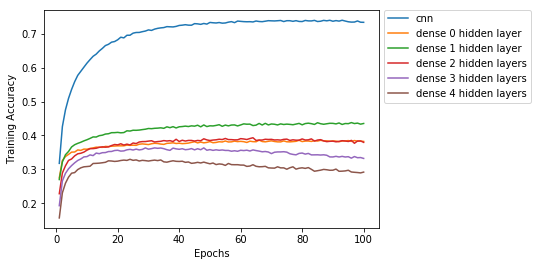

In [51]:
from matplotlib import pyplot as plt
% matplotlib inline
x = list(range(1, 101))

#cnn_acc = model.history.history['acc'][0:10]
#den0_acc = model7.history.history['acc'][0:10]
#den1_acc =  model0.history.history['acc'][0:10]
#den2_acc =  model1.history.history['acc'][0:10]
#den3_acc =  model2.history.history['acc'][0:10]
#den4_acc =  model3.history.history['acc'][0:10]

cnn_acc = model.history.history['acc']
den0_acc = model7.history.history['acc']
den1_acc =  model0.history.history['acc']
den2_acc =  model1.history.history['acc']
den3_acc =  model2.history.history['acc']
den4_acc =  model3.history.history['acc']

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(x, cnn_acc, label='cnn')
plt.plot(x, den0_acc, label='dense 0 hidden layer')
plt.plot(x, den1_acc, label='dense 1 hidden layer')
plt.plot(x, den2_acc, label='dense 2 hidden layers')
plt.plot(x, den3_acc, label='dense 3 hidden layers')
plt.plot(x, den4_acc, label='dense 4 hidden layers')
plt.legend(bbox_to_anchor=(0.9, 0.9),
           bbox_transform=plt.gcf().transFigure)
plt.show()

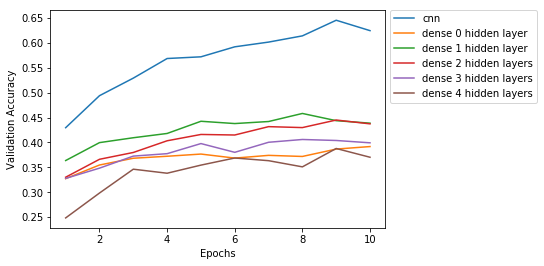

In [54]:
from matplotlib import pyplot as plt
% matplotlib inline
x = list(range(1, 11))

cnn_val_acc = model.history.history['val_acc'][0:10]
den0_val_acc = model7.history.history['val_acc'][0:10]
den1_val_acc =  model0.history.history['val_acc'][0:10]
den2_val_acc =  model1.history.history['val_acc'][0:10]
den3_val_acc =  model2.history.history['val_acc'][0:10]
den4_val_acc =  model3.history.history['val_acc'][0:10]

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(x, cnn_val_acc, label='cnn')
plt.plot(x, den0_val_acc, label='dense 0 hidden layer')
plt.plot(x, den1_val_acc, label='dense 1 hidden layer')
plt.plot(x, den2_val_acc, label='dense 2 hidden layers')
plt.plot(x, den3_val_acc, label='dense 3 hidden layers')
plt.plot(x, den4_val_acc, label='dense 4 hidden layers')
plt.legend(bbox_to_anchor=(0.9, 0.9),
           bbox_transform=plt.gcf().transFigure)
plt.show()

# (b) Sigmoid

In [23]:
batch_size = 32
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
modelb1_name = 'keras_cifar10_trained_model.b1'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

modelb1 = Sequential()
modelb1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
modelb1.add(Activation('sigmoid'))
modelb1.add(Conv2D(32, (3, 3)))
modelb1.add(Activation('sigmoid'))
modelb1.add(MaxPooling2D(pool_size=(2, 2)))
modelb1.add(Dropout(0.25))

modelb1.add(Conv2D(64, (3, 3), padding='same'))
modelb1.add(Activation('sigmoid'))
modelb1.add(Conv2D(64, (3, 3)))
modelb1.add(Activation('sigmoid'))
modelb1.add(MaxPooling2D(pool_size=(2, 2)))
modelb1.add(Dropout(0.25))

modelb1.add(Flatten())
modelb1.add(Dense(512))
modelb1.add(Activation('sigmoid'))
modelb1.add(Dropout(0.5))
modelb1.add(Dense(num_classes))
modelb1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelb1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    modelb1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    modelb1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
modelb1_path = os.path.join(save_dir, modelb1_name)
modelb1.save(modelb1_path)
print('Saved trained model at %s ' % modelb1_path)

# Score trained model.
scores = modelb1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/30
1563/1562 [==============================] - 19s 12ms/step - loss: 2.3309 - acc: 0.1002 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 2/30
1563/1562 [==============================] - 20s 13ms/step - loss: 2.3077 - acc: 0.1001 - val_loss: 2.3044 - val_acc: 0.1000
Epoch 3/30
1563/1562 [==============================] - 24s 15ms/step - loss: 2.3063 - acc: 0.0980 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 4/30
1563/1562 [==============================] - 24s 16ms/step - loss: 2.3056 - acc: 0.0975 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 5/30
1563/1562 [==============================] - 25s 16ms/step - loss: 2.3055 - acc: 0.0989 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 6/30
1563/1562 [==============================] - 27s 17ms/step - loss: 2.3049 - acc: 0.0998 - val_loss: 2.3041 - val_acc: 0.1000
Epoch 7/30
1563/1562 [==============================] - 28s 18ms/step - loss

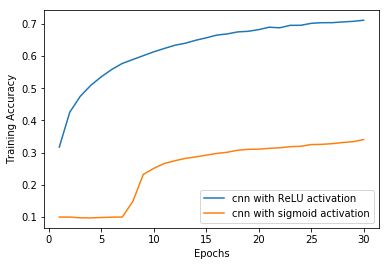

In [45]:
x = list(range(1, 31))

cnn_acc = model.history.history['acc'][0:30]
cnn_acc_sigmoid = modelb1.history.history['acc'][0:30]

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(x, cnn_acc, label='cnn with ReLU activation')
plt.plot(x, cnn_acc_sigmoid, label='cnn with sigmoid activation')

plt.legend()
plt.show()

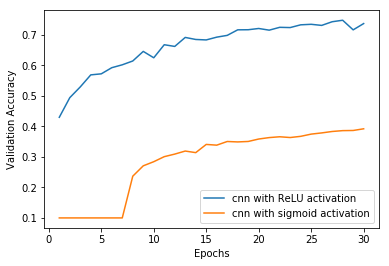

In [30]:
x = list(range(1, 31))

cnn_val_acc = model.history.history['val_acc'][0:30]
cnn_val_acc_sigmoid = modelb1.history.history['val_acc'][0:30]

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(x, cnn_val_acc, label='cnn with ReLU activation')
plt.plot(x, cnn_val_acc_sigmoid, label='cnn with sigmoid activation')

plt.legend()
plt.show()

# With dropout, no data augmentation

In [25]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
modelc1_name = 'keras_cifar10_trained_model.c1'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

modelc1 = Sequential()
modelc1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
modelc1.add(Activation('relu'))
modelc1.add(Conv2D(32, (3, 3)))
modelc1.add(Activation('relu'))
modelc1.add(MaxPooling2D(pool_size=(2, 2)))
modelc1.add(Dropout(0.25))

modelc1.add(Conv2D(64, (3, 3), padding='same'))
modelc1.add(Activation('relu'))
modelc1.add(Conv2D(64, (3, 3)))
modelc1.add(Activation('relu'))
modelc1.add(MaxPooling2D(pool_size=(2, 2)))
modelc1.add(Dropout(0.25))

modelc1.add(Flatten())
modelc1.add(Dense(512))
modelc1.add(Activation('relu'))
modelc1.add(Dropout(0.5))
modelc1.add(Dense(num_classes))
modelc1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelc1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    modelc1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    modelc1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
modelc1_path = os.path.join(save_dir, modelc1_name)
modelc1.save(modelc1_path)
print('Saved trained model at %s ' % modelc1_path)

# Score trained model.
scores = modelc1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 396us/step - loss: 1.8178 - acc: 0.3355 - val_loss: 1.5540 - val_acc: 0.4459
Epoch 2/100
50000/50000 [==============================] - 20s 393us/step - loss: 1.5041 - acc: 0.4531 - val_loss: 1.4280 - val_acc: 0.4946
Epoch 3/100
50000/50000 [==============================] - 23s 453us/step - loss: 1.3734 - acc: 0.5040 - val_loss: 1.2397 - val_acc: 0.5594
Epoch 4/100
50000/50000 [==============================] - 24s 472us/step - loss: 1.2766 - acc: 0.5418 - val_loss: 1.2172 - val_acc: 0.5721
Epoch 5/100
50000/50000 [==============================] - 21s 430us/step - loss: 1.1954 - acc: 0.5759 - val_loss: 1.0947 - val_acc: 0.6100
Epoch 6/100
50000/50000 [==============================] - 23s 469us/step - loss: 1.1191 - acc: 0.6048 - val_loss: 1.0497 - val_acc: 0.6331
Epoch 7/

50000/50000 [==============================] - 26s 526us/step - loss: 0.6181 - acc: 0.7953 - val_loss: 0.6617 - val_acc: 0.7836
Epoch 59/100
50000/50000 [==============================] - 26s 517us/step - loss: 0.6195 - acc: 0.7935 - val_loss: 0.6523 - val_acc: 0.7893
Epoch 60/100
50000/50000 [==============================] - 25s 503us/step - loss: 0.6164 - acc: 0.7948 - val_loss: 0.6499 - val_acc: 0.7824
Epoch 61/100
50000/50000 [==============================] - 25s 504us/step - loss: 0.6179 - acc: 0.7944 - val_loss: 0.6528 - val_acc: 0.7811
Epoch 62/100
50000/50000 [==============================] - 28s 560us/step - loss: 0.6179 - acc: 0.7942 - val_loss: 0.6672 - val_acc: 0.7843
Epoch 63/100
50000/50000 [==============================] - 30s 605us/step - loss: 0.6159 - acc: 0.7945 - val_loss: 0.6914 - val_acc: 0.7778
Epoch 64/100
50000/50000 [==============================] - 28s 562us/step - loss: 0.6204 - acc: 0.7928 - val_loss: 0.7394 - val_acc: 0.7727
Epoch 65/100
50000/50000 [

# Without dropout, with data augmentation

In [27]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
modelc2_name = 'keras_cifar10_trained_model.c2'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

modelc2 = Sequential()
modelc2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
modelc2.add(Activation('relu'))
modelc2.add(Conv2D(32, (3, 3)))
modelc2.add(Activation('relu'))
modelc2.add(MaxPooling2D(pool_size=(2, 2)))

modelc2.add(Conv2D(64, (3, 3), padding='same'))
modelc2.add(Activation('relu'))
modelc2.add(Conv2D(64, (3, 3)))
modelc2.add(Activation('relu'))
modelc2.add(MaxPooling2D(pool_size=(2, 2)))

modelc2.add(Flatten())
modelc2.add(Dense(512))
modelc2.add(Activation('relu'))
modelc2.add(Dense(num_classes))
modelc2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelc2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    modelc2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    modelc2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
modelc2_path = os.path.join(save_dir, modelc2_name)
modelc2.save(modelc2_path)
print('Saved trained model at %s ' % modelc2_path)

# Score trained model.
scores = modelc2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/100
1563/1562 [==============================] - 58s 37ms/step - loss: 1.7185 - acc: 0.3790 - val_loss: 1.4736 - val_acc: 0.4713
Epoch 2/100
1563/1562 [==============================] - 52s 33ms/step - loss: 1.4354 - acc: 0.4849 - val_loss: 1.3027 - val_acc: 0.5308
Epoch 3/100
1563/1562 [==============================] - 39s 25ms/step - loss: 1.3037 - acc: 0.5358 - val_loss: 1.2067 - val_acc: 0.5702
Epoch 4/100
1563/1562 [==============================] - 36s 23ms/step - loss: 1.2096 - acc: 0.5740 - val_loss: 1.2280 - val_acc: 0.5874
Epoch 5/100
1563/1562 [==============================] - 35s 22ms/step - loss: 1.1298 - acc: 0.5999 - val_loss: 1.1431 - val_acc: 0.6014
Epoch 6/100
1563/1562 [==============================] - 34s 21ms/step - loss: 1.0738 - acc: 0.6232 - val_loss: 0.9575 - val_acc: 0.6670
Epoch 7/100
1563/1562 [==============================] - 33s 21ms/step

1563/1562 [==============================] - 38s 24ms/step - loss: 0.4467 - acc: 0.8482 - val_loss: 0.6056 - val_acc: 0.8063
Epoch 60/100
1563/1562 [==============================] - 37s 24ms/step - loss: 0.4482 - acc: 0.8472 - val_loss: 0.6246 - val_acc: 0.7981
Epoch 61/100
1563/1562 [==============================] - 38s 24ms/step - loss: 0.4467 - acc: 0.8473 - val_loss: 0.6581 - val_acc: 0.8045
Epoch 62/100
1563/1562 [==============================] - 51s 33ms/step - loss: 0.4410 - acc: 0.8497 - val_loss: 0.5986 - val_acc: 0.8102
Epoch 63/100
1563/1562 [==============================] - 63s 41ms/step - loss: 0.4423 - acc: 0.8492 - val_loss: 0.6391 - val_acc: 0.8046
Epoch 64/100
1563/1562 [==============================] - 50s 32ms/step - loss: 0.4451 - acc: 0.8485 - val_loss: 0.5714 - val_acc: 0.8156
Epoch 65/100
1563/1562 [==============================] - 45s 29ms/step - loss: 0.4408 - acc: 0.8495 - val_loss: 0.6139 - val_acc: 0.8140
Epoch 66/100
1563/1562 [=======================

# Without dropout, without data augmentation

In [28]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
modelc3_name = 'keras_cifar10_trained_model.c3'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

modelc3 = Sequential()
modelc3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
modelc3.add(Activation('relu'))
modelc3.add(Conv2D(32, (3, 3)))
modelc3.add(Activation('relu'))
modelc3.add(MaxPooling2D(pool_size=(2, 2)))

modelc3.add(Conv2D(64, (3, 3), padding='same'))
modelc3.add(Activation('relu'))
modelc3.add(Conv2D(64, (3, 3)))
modelc3.add(Activation('relu'))
modelc3.add(MaxPooling2D(pool_size=(2, 2)))

modelc3.add(Flatten())
modelc3.add(Dense(512))
modelc3.add(Activation('relu'))
modelc3.add(Dense(num_classes))
modelc3.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelc3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    modelc3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    modelc3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                        steps_per_epoch=len(x_train)/batch_size)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
modelc3_path = os.path.join(save_dir, modelc3_name)
modelc3.save(modelc3_path)
print('Saved trained model at %s ' % modelc3_path)

# Score trained model.
scores = modelc3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 480us/step - loss: 1.6728 - acc: 0.3992 - val_loss: 1.4153 - val_acc: 0.4907
Epoch 2/100
50000/50000 [==============================] - 23s 456us/step - loss: 1.3489 - acc: 0.5219 - val_loss: 1.3303 - val_acc: 0.5312
Epoch 3/100
50000/50000 [==============================] - 24s 477us/step - loss: 1.1967 - acc: 0.5795 - val_loss: 1.1912 - val_acc: 0.5809
Epoch 4/100
50000/50000 [==============================] - 35s 703us/step - loss: 1.0814 - acc: 0.6221 - val_loss: 1.1077 - val_acc: 0.6211
Epoch 5/100
50000/50000 [==============================] - 35s 702us/step - loss: 0.9862 - acc: 0.6577 - val_loss: 1.0355 - val_acc: 0.6424
Epoch 6/100
50000/50000 [==============================] - 35s 709us/step - loss: 0.9115 - acc: 0.6863 - val_loss: 0.9831 - val_acc: 0.6623
Epoch 7/

50000/50000 [==============================] - 32s 642us/step - loss: 0.0136 - acc: 0.9954 - val_loss: 2.4773 - val_acc: 0.7272
Epoch 58/100
50000/50000 [==============================] - 28s 553us/step - loss: 0.0133 - acc: 0.9956 - val_loss: 2.4658 - val_acc: 0.7239
Epoch 59/100
50000/50000 [==============================] - 34s 681us/step - loss: 0.0136 - acc: 0.9955 - val_loss: 2.4644 - val_acc: 0.7290
Epoch 60/100
50000/50000 [==============================] - 28s 560us/step - loss: 0.0140 - acc: 0.9955 - val_loss: 2.5285 - val_acc: 0.7252
Epoch 61/100
50000/50000 [==============================] - 30s 591us/step - loss: 0.0131 - acc: 0.9957 - val_loss: 2.5830 - val_acc: 0.7220 -
Epoch 62/100
50000/50000 [==============================] - 33s 662us/step - loss: 0.0124 - acc: 0.9961 - val_loss: 2.5650 - val_acc: 0.7238
Epoch 63/100
50000/50000 [==============================] - 35s 698us/step - loss: 0.0135 - acc: 0.9954 - val_loss: 2.6042 - val_acc: 0.7237
Epoch 64/100
50000/50000

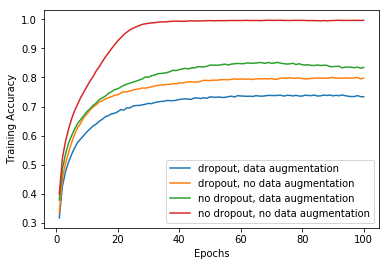

In [47]:
x = list(range(1, 101))

cnn_acc = model.history.history['acc']
cnn_acc_d_na = modelc1.history.history['acc']
cnn_acc_nd_a = modelc2.history.history['acc']
cnn_acc_nd_na = modelc3.history.history['acc']

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(x, cnn_acc, label='dropout, data augmentation')
plt.plot(x, cnn_acc_d_na, label='dropout, no data augmentation')
plt.plot(x, cnn_acc_nd_a, label='no dropout, data augmentation')
plt.plot(x, cnn_acc_nd_na, label='no dropout, no data augmentation')
plt.legend()
plt.show()

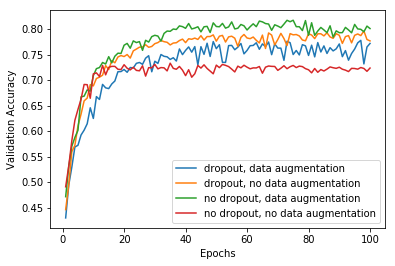

In [46]:
x = list(range(1, 101))

cnn_val_acc = model.history.history['val_acc']
cnn_val_acc_d_na = modelc1.history.history['val_acc']
cnn_val_acc_nd_a = modelc2.history.history['val_acc']
cnn_val_acc_nd_na = modelc3.history.history['val_acc']

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(x, cnn_val_acc, label='dropout, data augmentation')
plt.plot(x, cnn_val_acc_d_na, label='dropout, no data augmentation')
plt.plot(x, cnn_val_acc_nd_a, label='no dropout, data augmentation')
plt.plot(x, cnn_val_acc_nd_na, label='no dropout, no data augmentation')
plt.legend()
plt.show()